# Dynamic Time Warping (DTW)

##Aim
 To compare and align two numerical sequences using Dynamic Time Warping (DTW) and evaluate their similarity based on the DTW distance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

vector1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

# Plot both vectors to visualize their patterns.

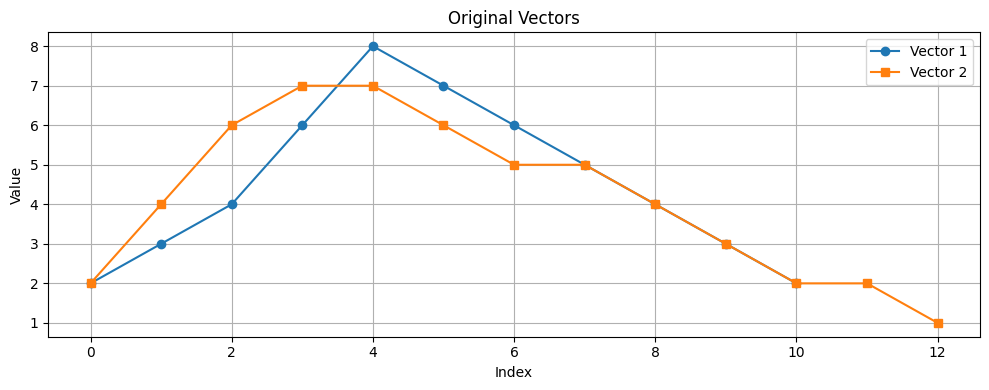

In [2]:
plt.figure(figsize=(10,4))
plt.plot(vector1, marker='o', label='Vector 1')
plt.plot(vector2, marker='s', label='Vector 2')
plt.title('Original Vectors')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Vector 2 is longer and slightly shifted compared to Vector 1, meaning the patterns are stretched as well as possibly misaligned along the time axis.​

While both vectors display similar rising and falling trends, their peaks and valleys are distributed differently over time.

# Implement Dynamic Time Warping (DTW) algorithm

In [3]:
def dtw(v1, v2):
    n1, n2 = len(v1), len(v2)
    dtw_matrix = np.full((n1+1, n2+1), np.inf)
    dtw_matrix[0,0] = 0
    for i in range(1, n1+1):
        for j in range(1, n2+1):
            cost = abs(v1[i-1] - v2[j-1])
            dtw_matrix[i,j] = cost + min(
                dtw_matrix[i-1,j],    # insertion
                dtw_matrix[i,j-1],    # deletion
                dtw_matrix[i-1,j-1]   # match
            )
    return dtw_matrix[1:, 1:]

# Compute the accumulated cost matrix.

In [4]:
cost_matrix = dtw(vector1, vector2)

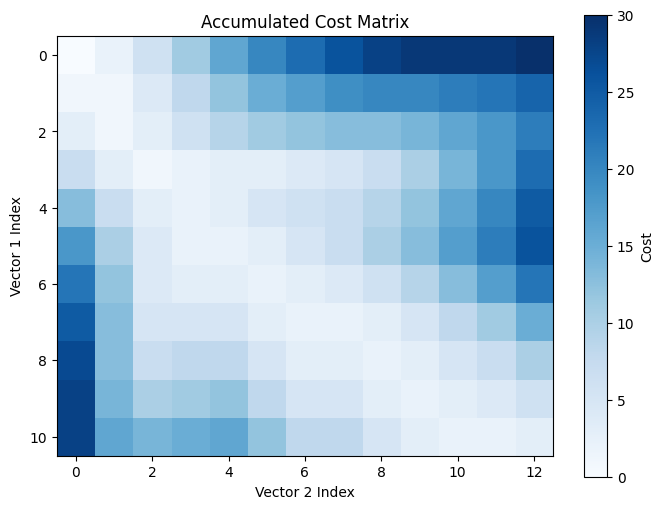

In [5]:
plt.figure(figsize=(8,6))
plt.imshow(cost_matrix, interpolation='nearest', cmap='Blues')
plt.title('Accumulated Cost Matrix')
plt.xlabel('Vector 2 Index')
plt.ylabel('Vector 1 Index')
plt.colorbar(label='Cost')
plt.show()

Lighter colors indicate lower alignment costs, while darker colors represent higher costs.​

The cost matrix visually encodes the difficulties in aligning certain regions, often caused by different temporal distortions.

# Find and visualize the warping path.

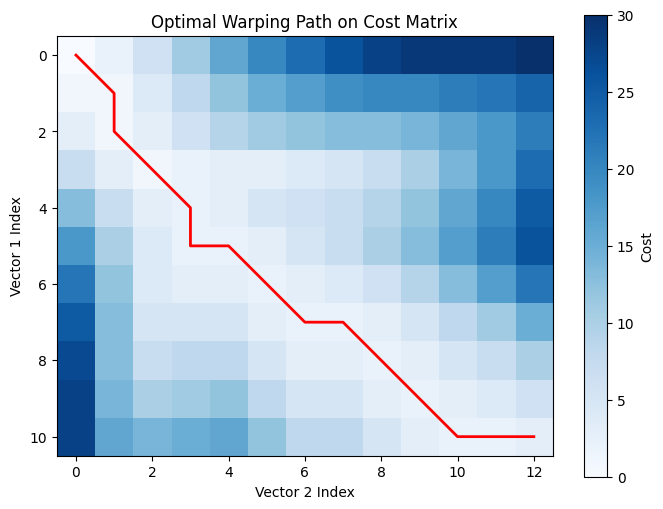

In [8]:
i, j = cost_matrix.shape[0]-1, cost_matrix.shape[1]-1
path = []
while i > 0 or j > 0:
    path.append((i,j))
    moves = []
    if i > 0: moves.append(cost_matrix[i-1,j])
    else: moves.append(np.inf)
    if j > 0: moves.append(cost_matrix[i,j-1])
    else: moves.append(np.inf)
    if i > 0 and j > 0: moves.append(cost_matrix[i-1,j-1])
    else: moves.append(np.inf)
    min_move = np.argmin(moves)
    if min_move == 0: i -= 1
    elif min_move == 1: j -= 1
    else:
        i -= 1
        j -= 1
path.append((0,0))
path = path[::-1]

plt.figure(figsize=(8,6))
plt.imshow(cost_matrix, interpolation='nearest', cmap='Blues')
plt.plot([j for i,j in path], [i for i,j in path], 'r', linewidth=2)
plt.title('Optimal Warping Path on Cost Matrix')
plt.xlabel('Vector 2 Index')
plt.ylabel('Vector 1 Index')
plt.colorbar(label='Cost')
plt.show()


It maps how elements of Vector 1 correspond to elements of Vector 2 for minimal total alignment cost.​

Non-diagonal segments in the warping path illustrate where elements in one sequence must be 'stretched' or matched to multiple elements in the other, reflecting the flexibility of DTW in aligning sequences of different lengths or speeds.

# Calculate the DTW distance between the vectors.

In [7]:
dtw_distance = cost_matrix[-1,-1]
print(f"DTW Distance = {dtw_distance:.2f}")

DTW Distance = 3.00


A smaller DTW distance (like 3.00) means the vectors are quite similar in overall shape and pattern, despite temporal distortions.

DTW is particularly effective at capturing such similarity even when the sequences are of unequal length or are shifted and compressed in some regions.

# Write an inference explaining how the warping path aligns the two vectors and what the DTW distance reveals about their similarity.

The warping path in Dynamic Time Warping (DTW) shows how two sequences are optimally aligned by allowing stretching and compressing along the time axis, rather than forcing a strict one-to-one mapping. This path may include diagonal steps (direct matches), horizontal or vertical steps (one value matched to multiple values), which enables DTW to align similar patterns even if the sequences differ in length or local timing.​​

The optimal warping path traces the lowest accumulated cost through the cost matrix, meaning it finds the most efficient way to align all elements, even if parts of one sequence are stretched or compressed to match the other.​

A DTW distance of 3.00 indicates that the overall shapes and patterns of the two vectors are quite similar—a low score means there’s only a small amount of warping or distortion needed to align them. In summary, the DTW warping path provides a flexible alignment between sequences, and the DTW distance quantifies their similarity: the smaller the distance, the more alike the sequences are in structure and features, regardless of timing differences.​